In [1]:
pip install tensorflow[and-cuda]

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing the dependencies 
import math
import pandas as pd  
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt 
import matplotlib
from sklearn. preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout 
from sklearn. model_selection import TimeSeriesSplit 
from sklearn. metrics import mean_squared_error, r2_score 
import matplotlib. dates as mandates 
from sklearn.preprocessing import MinMaxScaler 
from sklearn import linear_model 
from keras.models import Sequential 
from keras. layers import Dense 
import keras. backend as K
from keras.callbacks import EarlyStopping 
from keras.optimizers import Adam 
from keras .models import load_model 
from keras. layers import LSTM 
from keras.utils import plot_model

import findspark
findspark.init()

In [3]:
# File to load
tesla_data_to_load =("Resources\TSLA_HData_5y.csv")

# Read file and store into Pandas dataframe
df = pd.read_csv(tesla_data_to_load)
df

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,TSLA,12/11/18,24.660667,24.811333,24.015333,24.450666,24.450666,94632000
1,TSLA,12/12/18,24.628000,24.794001,24.344000,24.440001,24.440001,75405000
2,TSLA,12/13/18,24.676666,25.162666,24.450001,25.119333,25.119333,110488500
3,TSLA,12/14/18,25.000000,25.191334,24.288668,24.380667,24.380667,95064000
4,TSLA,12/17/18,24.133333,24.379999,22.925333,23.228001,23.228001,115110000
...,...,...,...,...,...,...,...,...
1253,TSLA,12/4/23,235.750000,239.369995,233.289993,235.580002,235.580002,104099800
1254,TSLA,12/5/23,233.869995,246.660004,233.699997,238.720001,238.720001,137971100
1255,TSLA,12/6/23,242.919998,246.570007,239.169998,239.369995,239.369995,126436200
1256,TSLA,12/7/23,241.550003,244.080002,236.979996,242.639999,242.639999,107142300


In [5]:
df['Date'] = pd.to_datetime(df['Date']) 
df.set_index('Date', inplace=True)

C:\Users\Franc\AppData\Local\Temp\ipykernel_18256\2796398601.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df.shape

(1258, 7)

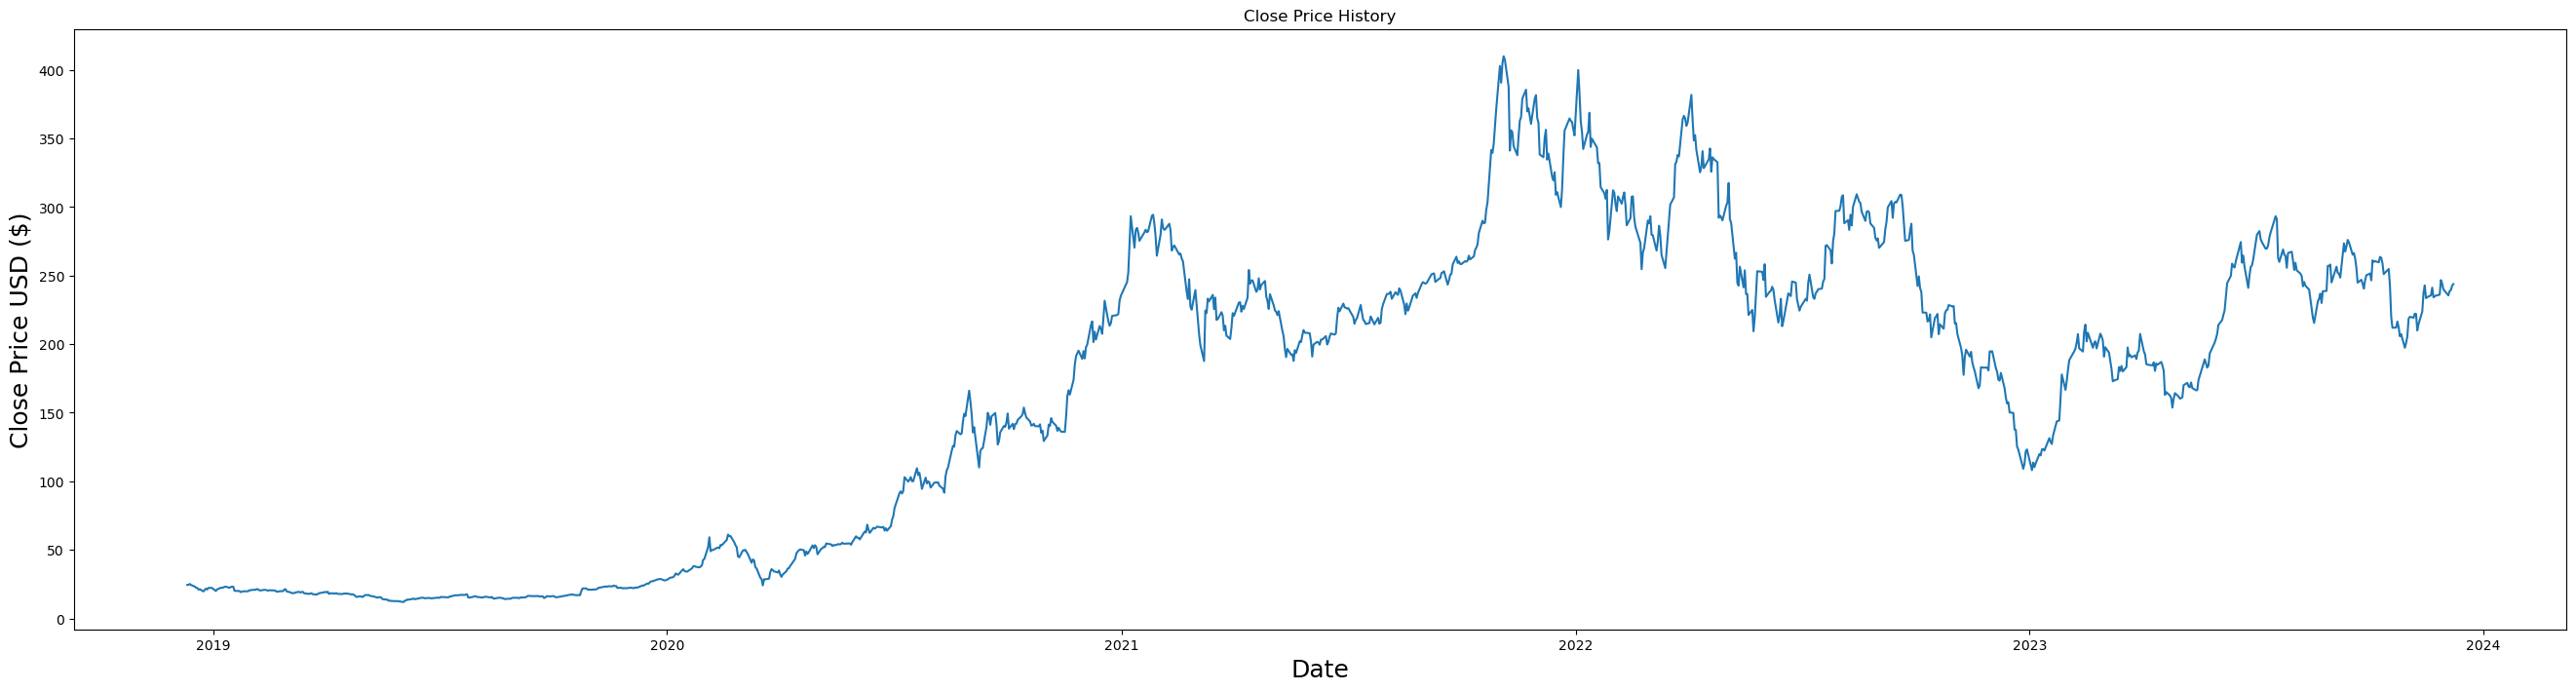

In [7]:
# Visualize the closing price history
plt.figure(figsize=(33,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18 )
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a dataframe with only the 'Create Column
data= df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset= data.values
# Get the number of rows to train the model on
training_data_len= math.ceil(len(dataset)* 0.8)
training_data_len

1007

In [21]:
# Scale the all of the data to be values between 0 and 1 
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.03145255],
       [0.03142576],
       [0.03313246],
       ...,
       [0.57139841],
       [0.5796137 ],
       [0.58262848]])

In [22]:
# Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
# Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(30,len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

    if i<=30:
      print(x_train)
      print(y_train)
      print()

[array([0.03145255, 0.03142576, 0.03313246, 0.03127669, 0.02838083,
       0.02647314, 0.02579314, 0.02284703, 0.0235823 , 0.01949894,
       0.02464082, 0.02297264, 0.02594388, 0.02576467, 0.02196604,
       0.02033136, 0.02323392, 0.02612644, 0.02619176, 0.02672437,
       0.02780299, 0.02818654, 0.02603265, 0.02771255, 0.02798388,
       0.02819491, 0.02064959, 0.02009017, 0.01819254, 0.01884909])]
[0.019775302333189398]



In [23]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
# Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(977, 30, 1)

In [25]:
# Build the LSTM network model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=32))
model.add(Dense(units=1))

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10

977/977 [==============================] - 7s 5ms/step - loss: 0.0040
Epoch 2/10
977/977 [==============================] - 5s 5ms/step - loss: 0.0017
Epoch 3/10
977/977 [==============================] - 5s 5ms/step - loss: 0.0012
Epoch 4/10
977/977 [==============================] - 5s 5ms/step - loss: 0.0010
Epoch 5/10
977/977 [==============================] - 5s 5ms/step - loss: 9.8559e-04
Epoch 6/10
977/977 [==============================] - 5s 5ms/step - loss: 8.2487e-04
Epoch 7/10
977/977 [==============================] - 5s 5ms/step - loss: 0.0011
Epoch 8/10
977/977 [==============================] - 5s 5ms/step - loss: 8.3853e-04
Epoch 9/10
977/977 [==============================] - 5s 5ms/step - loss: 7.3018e-04
Epoch 10/10
977/977 [==============================] - 5s 5ms/step - loss: 7.5123e-04


In [30]:
# Test data set
test_data = scaled_data[training_data_len - 30: , : ]
# Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [31]:
# Convert x_test to a numpy array 
x_test = np.array(x_test)

In [32]:
# Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(251, 30, 1)

In [33]:
# Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)
# Undo scaling

8/8 [==============================] - 0s 3ms/step


In [34]:
# Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

7.473549627527109

C:\Users\Franc\AppData\Local\Temp\ipykernel_18256\1305408927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


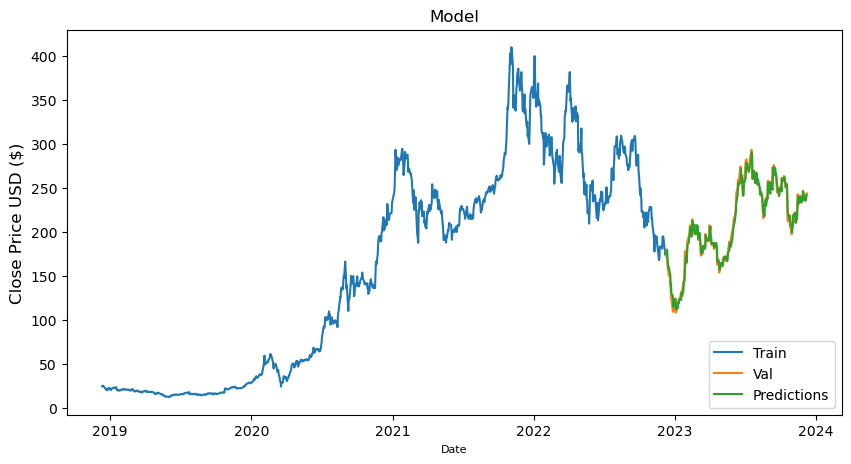

In [35]:

# Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [36]:
# Show the valid and predicted price
valid

,Close,Predictions
Date,,
2022-12-09,179.050003,175.285217
2022-12-12,167.820007,179.835403
2022-12-13,160.949997,169.872650
2022-12-14,156.800003,163.901215
2022-12-15,157.669998,159.690735
...,...,...
2023-12-04,235.580002,238.481812
2023-12-05,238.720001,235.449707
2023-12-06,239.369995,238.655136


# Analysis:

## After analyzing the historical data and predicting the TSLA stock performance over 180 days, we noticed:

### Pros:
* Our initial goal was to get at least 75% classification accuracy but we ended up getting a 85% accuracy
* RSME of 9.21 is more accurate than RSME of the initial test, 12
* There is a postive correlation between the days of prediction and RSME vlaue (the more days for prediction led to a smaller RSME value) 

### Cons:
* Although our data had a 85% accuracy, the prediction fell slightly short of the valid closing price
* Stock market in general is hard to predict, wouldn't we all be billionaires if we could predict with 100% accuracy?

Overall, Tesla actual performance exceeds the machine learning predictions, proving that the stock is not overvalued to the dismay of critics and may continue performing well with the recent release of the Cybertruck.